In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
  
def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")  

# canny edge

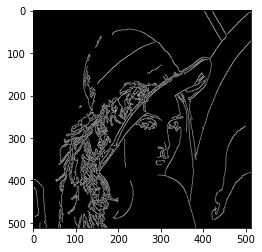

In [ ]:
src = cv2.imread('lenna.bmp', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (3, 3), 0)

dst1 = cv2.Canny(src, 50, 200)

imshow("", dst1)



# Hough transform

(24, 1, 4)
[[180 309 737  72]]


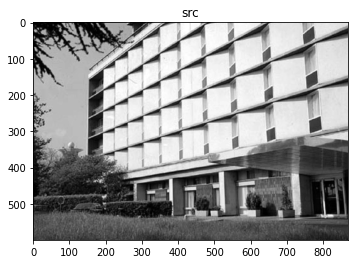

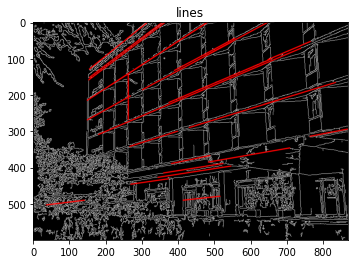

In [ ]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

edge = cv2.Canny(src, 50, 150)

lines = cv2.HoughLinesP(edge, 1, 3.141592 / 180, 160,  minLineLength=100,maxLineGap=5)

print(lines.shape)

print(lines[0])

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
  
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src); plt.show()
imshow('lines', dst); 

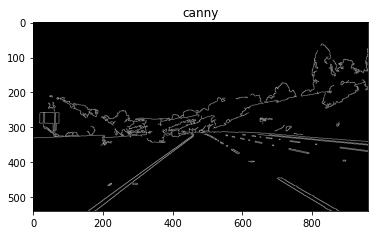

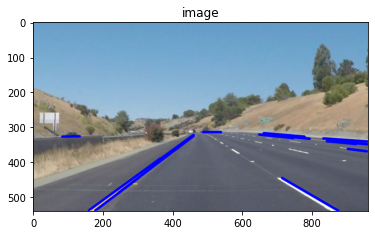

In [ ]:
image = cv2.imread('lane.jpg')


canny = cv2.Canny(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 70, 200)

lines = cv2.HoughLinesP(canny, 1, 3.141592 / 180, 160, minLineLength=50, maxLineGap=5)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(image, pt1, pt2, (255, 0, 0), 5, cv2.LINE_AA)

imshow("canny", canny); plt.show()
imshow("image", image); plt.show()


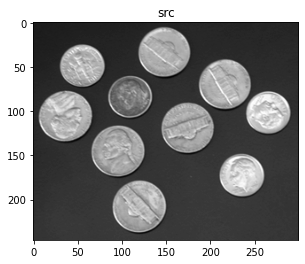

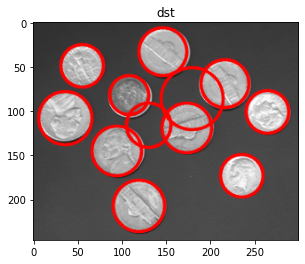

In [ ]:
src = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.blur(src, (3, 3))
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, 30,
                              param1=150, param2=30)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(circles.shape[1]):  # 1,개수,
     cx, cy, radius = circles[0][i]
     cv2.circle(dst, (cx, cy), int(radius), (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

322.5 383.5 28.8 212
249.5 68.5 28.8 50
177.5 263.5 28.3 213
255.5 330.5 28.0 212
381.5 308.5 99.4 153
198.5 315.5 28.6 46
309.5 77.5 27.7 46
294.5 258.5 29.1 216
300.5 138.5 27.9 213
239.5 137.5 28.9 211
262.5 388.5 29.4 56
356.5 273.5 28.6 213
240.5 274.5 27.7 214
360.5 337.5 29.4 50
83.5 132.5 27.2 213
242.5 198.5 27.5 43
137.5 164.5 78.5 140
177.5 133.5 29.4 43
424.5 272.5 28.6 50
365.5 148.5 27.1 43
132.5 298.5 32.9 136
176.5 206.5 28.6 50
200.5 169.5 24.0 129


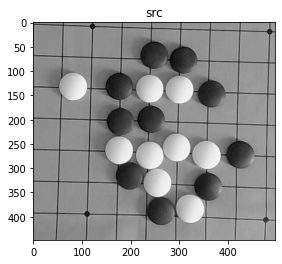

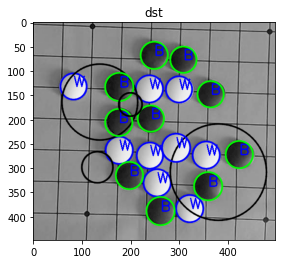

In [ ]:
src = cv2.imread('stone.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.blur(src, (3, 3))
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1,20,
                              param1=150, param2=30, maxRadius=100)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(circles.shape[1]):  # 1,개수,
     cx, cy, radius = circles[0][i] 
     col = src[int(cy), int(cx)]
     print(cx, cy, radius,   col) 
     
     if col > 200 :
      c = (255,0,0)
      cv2.putText(dst, 'W',(int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
     elif col < 70 :   
      c = (0,255,0)
      cv2.putText(dst, 'B',(int(cx), int(cy)), cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),2)
      
     else :
       c = (0,0,0)
      
     cv2.circle(dst, (int(cx), int(cy)), int(radius), c, 2, cv2.LINE_AA)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

# 레이블링

In [ ]:
src = np.array(    [[0, 0, 1, 1, 0, 0, 0, 0],
                    [1, 1, 1, 1, 0, 0, 1, 0],
                    [1, 1, 1, 1, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 1, 1, 0],
                    [0, 0, 0, 1, 1, 1, 1, 0],
                    [0, 0, 0, 1, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0]]).astype(np.uint8)

src = src * 255
print(src)

[[  0   0 255 255   0   0   0   0]
 [255 255 255 255   0   0 255   0]
 [255 255 255 255   0   0   0   0]
 [  0   0   0   0   0 255 255   0]
 [  0   0   0 255 255 255 255   0]
 [  0   0   0 255   0   0 255   0]
 [  0   0 255 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0]]


In [ ]:
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src)
    
print(cnt)
print(labels)
print(stats)
print(centroids)    

4
[[0 0 1 1 0 0 0 0]
 [1 1 1 1 0 0 2 0]
 [1 1 1 1 0 0 0 0]
 [0 0 0 0 0 3 3 0]
 [0 0 0 3 3 3 3 0]
 [0 0 0 3 0 0 3 0]
 [0 0 3 3 3 3 3 0]
 [0 0 0 0 0 0 0 0]]
[[ 0  0  8  8 40]
 [ 0  0  4  3 10]
 [ 6  1  1  1  1]
 [ 2  3  5  4 13]]
[[3.575      3.725     ]
 [1.7        1.2       ]
 [6.         1.        ]
 [4.46153846 4.76923077]]


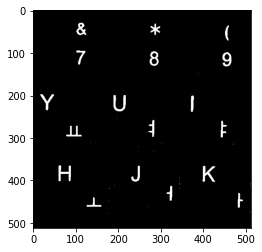

In [ ]:
src = cv2.imread('keyboard.bmp', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

imshow("", src_bin)

352
263
173
1
237
378
382
1
355
458
226
1
249
243
315
1
1
2
1
1
469
267
476
1
1
3
1
1
1
213
1
2
1
189
214
1
1
1
1
1


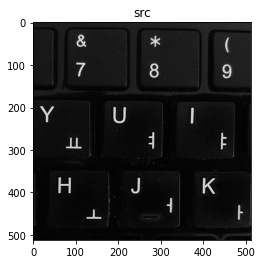

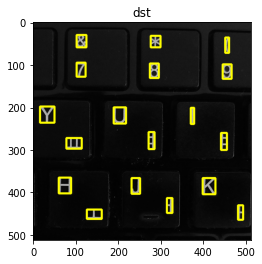

In [ ]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
        (x, y, w, h, area) = stats[i]
        print(area)

        if area < 20:
            continue

        pt1 = (x, y)
        pt2 = (x + w, y + h)
        cv2.rectangle(dst, pt1, pt2, (0, 255, 255), 4)

imshow('src', src); plt.show()
imshow('dst', dst); plt.show()

# contoure 추출

896 [[ 50 200]]
796 [[50 50]]


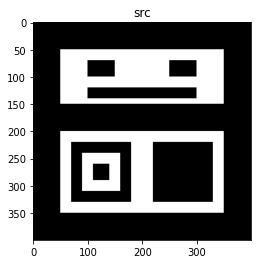

In [ ]:
src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

imshow("src", src)

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

In [ ]:
print(contours[0].shape)
c1 = contours[0]
print(c1[1, 0, 0], c1[1, 0, 1]) 

(896, 1, 2)
50 201


In [ ]:
contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

4 [[ 50 200]]
4 [[50 50]]


In [ ]:
src = cv2.imread('triangle.png', cv2.IMREAD_GRAYSCALE)

contours, _ = cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for i in range(len(contours)) :
    print(len(contours[i]),  contours[i][0])

4 [[0 0]]


In [ ]:
print(contours)

[array([[[  0,   0]],

       [[  0, 240]],

       [[305, 240]],

       [[305,   0]]], dtype=int32)]


(8, 1, 2)


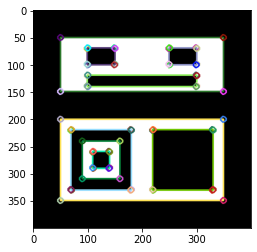

In [ ]:
import random

src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

contours, _ = cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

print(contours[0].shape)


for  l in range(len(contours)):

  c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
  cv2.drawContours(dst, contours, l, c, 2)

  for i in range(len(contours[l])):
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

    p = contours[l][i][0]
    cv2.circle(dst, (p[0], p[1]), 5, c, 2)       


#cv2.drawContours(dst, contours, -1, (0,0,255), 2)
imshow("", dst)       

# contour  approximation

13340.5
8085.5
10359.0
0.0
6406.5
4181.0
6723.0
9930.5
10315.5


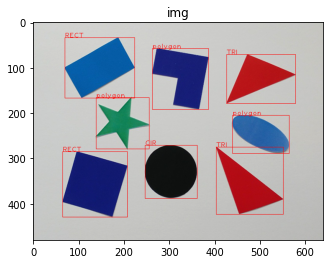

In [ ]:
import math

def setLabel(img, pts, label):
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


img = cv2.imread('polygon.bmp', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for pts in contours:
    print(cv2.contourArea(pts))
    if cv2.contourArea(pts) < 400:
        continue

    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    vtc = len(approx)

    if vtc == 3:
        setLabel(img, pts, 'TRI')
    elif vtc == 4:
        setLabel(img, pts, 'RECT')
    else:
        lenth = cv2.arcLength(pts, True)
        area = cv2.contourArea(pts)
        ratio = 4. * math.pi * area / (lenth * lenth)

        if ratio > 0.85:
            setLabel(img, pts, 'CIR')
        else :
            setLabel(img, pts, 'polygon')

imshow('img', img)

# 책 검출 실습 과제

- 이진화 
- 블러링
- 모폴로지 연산
- canny edge

- contour 추출
- length , area
 - dp알고리즘으로 approximation
 - 꼭지점이 4개냐?  +1

 - 4권 책이있고, box 출력

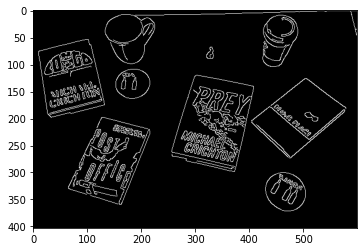

In [ ]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)
imshow("", edged)

In [ ]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


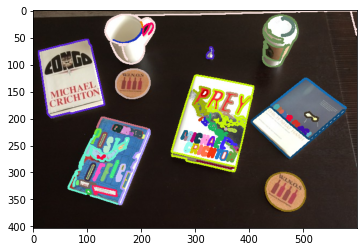

In [ ]:
 image = cv2.imread("book.jpg")
 for cnt in cnts :
  c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
  cv2.drawContours(image, [cnt], -1, c, 2)

imshow("", image)

In [ ]:
cnts

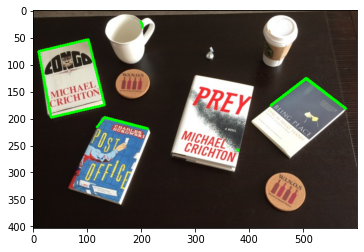

In [ ]:
image = cv2.imread("book.jpg")
for cnt in cnts:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)

imshow("", image)

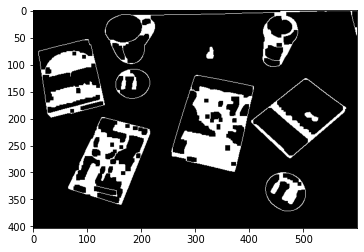

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow("", closed)b

2
7
9
8
8
8
11
7
8
7
2
5
13
8
4
9
10
12
9
5
9
12
12
9
13
12
8
9
10
11
12
12
5
8
7
9
12
10
10
3
9
9
13
5
17
15
12
13
15
12
4
13
11
8
9
15
9
9
5
14
10
7
12
4
13
8
10
4
8
8
4
11
12
11


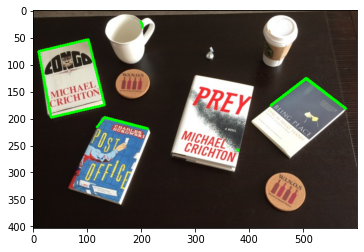

In [ ]:
cnts, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for cnt in cnts:
    peri = cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, 0.02 * peri, True)
    print(len(approx))
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
imshow("", image)

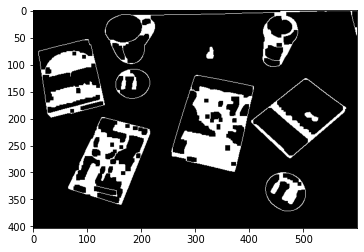

In [ ]:
image = cv2.imread("book.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
imshow("", closed)

In [ ]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0
print(len(cnts))

8


8
4
4
4
8
8
4
10
I found 4 books in that image


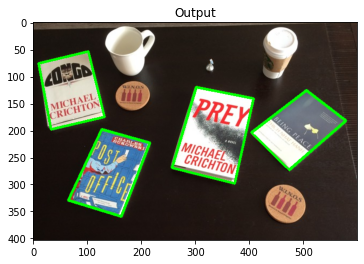

In [ ]:
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print(len(approx))
    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

8
4
10
8
4
8
8
4
12
8
I found 10 books in that image


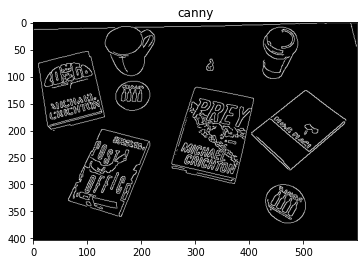

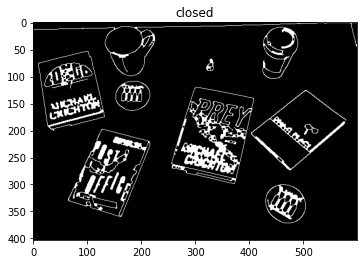

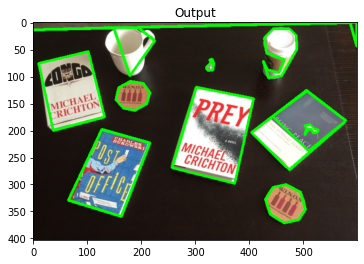

In [ ]:
image = cv2.imread("book.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(gray, 30, 200)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    print(len(approx))
    if len(approx) > 0 :
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))

imshow("canny", edged); plt.show()
imshow("closed", closed); plt.show()
imshow("Output", image)

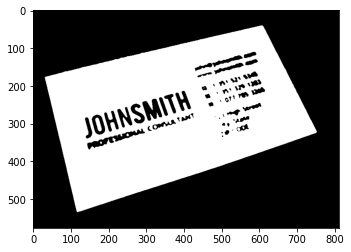

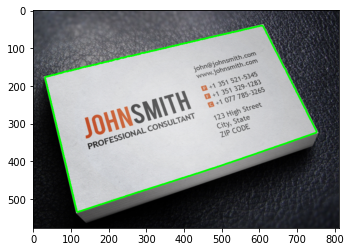

In [ ]:
img = cv2.imread('namecard.PNG', 0)

gray = cv2.GaussianBlur(img, (13, 13), 0)
_,binary = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY)

imshow("", binary); plt.show()

closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, None,iterations=2)

imshow("", closed )

contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

img = cv2.imread('namecard.PNG')
cv2.drawContours(img, contours, -1, (0, 255, 0), 4)
imshow("", img )


In [ ]:
card = contours[0]
peri = cv2.arcLength(card, True)
approx = cv2.approxPolyDP(card, 0.02*peri,True).astype(np.float32) 
print(approx) 

[[[610.  43.]]

 [[ 32. 177.]]

 [[116. 533.]]

 [[749. 325.]]]


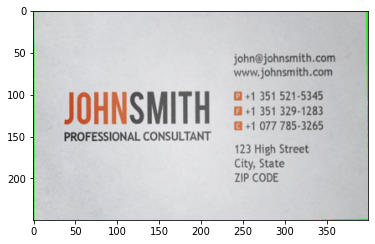

In [ ]:
h = np.array([ [399,0],[0,0],[0,250],[399,250] ],np.float32)
approx = approx.reshape(4,2)
transform = cv2.getPerspectiveTransform(approx, h)  # 대응관계 계산


output = cv2.warpPerspective(img,transform, (400,250))   # 영상을 변환
imshow("", output)

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:


import pytesseract
text = pytesseract.image_to_string(output)
print(text)